In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
df = pd.DataFrame({'Mimic':[1,1,1,1,0,0,0,0],
                  'Polyketide':[1,1,0,0,1,1,0,0],
                  'Pantetheine':[1,0,1,0,1,0,1,0],
                  'Location':['Joel','Gabe','Gabe','Joel','Gabe','Gabe','Joel','Joel']})

df_pred = pd.DataFrame({'Mimic':[1,1,1,1,0,0,0,0],
                  'Polyketide':[1,1,0,0,1,1,0,0],
                  'Pantetheine':[1,0,1,0,1,0,1,0]})

# For 'Mimic', 1 = "Mimic", 0 = "Natural"
# For 'Polyketide', 1 = "Octaketide", 0 = "Tetraketide"
# For 'Pantetheine', 1 = "With P", 0 = "without P"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Mimic          8 non-null int64
Polyketide     8 non-null int64
Pantetheine    8 non-null int64
Location       8 non-null object
dtypes: int64(3), object(1)
memory usage: 336.0+ bytes


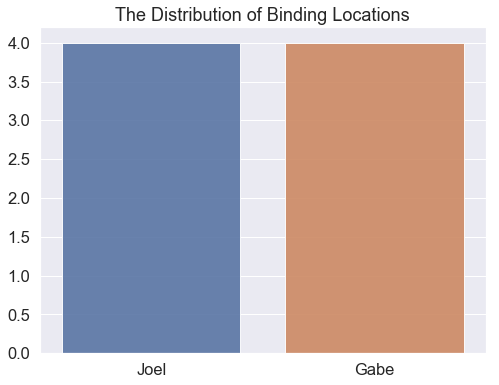

Joel    4
Gabe    4
Name: Location, dtype: int64


In [5]:
plt.figure(figsize=(8,6))

sns.set(font_scale=1.5)
sns.barplot(df['Location'].value_counts().index, df['Location'].value_counts().values, alpha=0.9)
plt.title('The Distribution of Binding Locations')
plt.show()

print(df['Location'].value_counts())

In [6]:
from sklearn import model_selection

loocv = model_selection.LeaveOneOut()

# Specify the data
cols = [col for col in df.columns if col not in ['Location']]
X = df[cols]

# Specify the target labels and flatten the array 
y = df['Location']

X_pred = df_pred

In [7]:
X

,Mimic,Polyketide,Pantetheine
0,1,1,1
1,1,1,0
2,1,0,1
3,1,0,0
4,0,1,1
5,0,1,0
6,0,0,1
7,0,0,0


In [8]:
y

0    Joel
1    Gabe
2    Gabe
3    Joel
4    Gabe
5    Gabe
6    Joel
7    Joel
Name: Location, dtype: object

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

#create an object of the type Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=1)

#train the algorithm on training data and predict using the testing data
dt.fit(X, y)   # Since partial_fit is not supported for decision tree, we can only fit once

results = model_selection.cross_val_score(dt, X, y, cv=loocv)

print("LOOCV score of Decision Tree model: ",results.mean())

LOOCV score of Decision Tree model:  0.75


In [10]:
y_pred = dt.predict(X_pred)
y_proba = dt.predict_proba(X_pred)

print('X_pred:')
print(X_pred)
print()
print('y_pred:')
print(y_pred)
print()
print('y_proba:')
print(y_proba)

X_pred:
   Mimic  Polyketide  Pantetheine
0      1           1            1
1      1           1            0
2      1           0            1
3      1           0            0
4      0           1            1
5      0           1            0
6      0           0            1
7      0           0            0

y_pred:
['Gabe' 'Gabe' 'Joel' 'Joel' 'Gabe' 'Gabe' 'Joel' 'Joel']

y_proba:
[[0.75 0.25]
 [0.75 0.25]
 [0.25 0.75]
 [0.25 0.75]
 [0.75 0.25]
 [0.75 0.25]
 [0.25 0.75]
 [0.25 0.75]]


In [11]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=cols,
                           class_names=['Gabe','Joel'],
                           label='all', impurity=False,
                           rounded=True, filled=True,
                           special_characters=True)  
graph = graphviz.Source(dot_data)

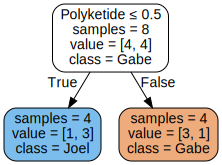

In [12]:
graph

## Bernoulli Naive Bayes Model

Note: Some of the features in our data might not be Gaussian distributed. The Gaussian Naive Bayes is an approximate estimation.

In [35]:
from sklearn.naive_bayes import BernoulliNB

#create an object of the type GaussianNB
bnb = BernoulliNB()

#train the algorithm on training data and predict using the testing data
#gnb.fit(X, y)

accuracy_list = []
for epoch in range(10):

    score_list = []
    
    for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        bnb.partial_fit(X_train, y_train,classes=np.unique(y))
        score_list.append(bnb.score(X_test,y_test))
        #print(score_list)
        
    accuracy_list.append(np.mean(score_list))
    print("Epoch =",epoch,", Accuracy =", np.mean(score_list))

print('The accuracy convergence against epochs:',accuracy_list)

Epoch = 0 , Accuracy = 0.75
Epoch = 1 , Accuracy = 0.75
Epoch = 2 , Accuracy = 0.75
Epoch = 3 , Accuracy = 0.75
Epoch = 4 , Accuracy = 0.75
Epoch = 5 , Accuracy = 0.75
Epoch = 6 , Accuracy = 0.75
Epoch = 7 , Accuracy = 0.75
Epoch = 8 , Accuracy = 0.75
Epoch = 9 , Accuracy = 0.75
The accuracy convergence against epochs: [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


In [15]:
y_pred = bnb.predict(X_pred)
y_proba = bnb.predict_proba(X_pred)

print('X_pred:')
print(X_pred)
print()
print('y_pred:')
print(y_pred)
print()
print('y_proba:')
print(y_proba)

X_pred:
   Mimic  Polyketide  Pantetheine
0      1           1            1
1      1           1            0
2      1           0            1
3      1           0            0
4      0           1            1
5      0           1            0
6      0           0            1
7      0           0            0

y_pred:
['Gabe' 'Gabe' 'Joel' 'Joel' 'Gabe' 'Gabe' 'Joel' 'Joel']

y_proba:
[[0.74822695 0.25177305]
 [0.74822695 0.25177305]
 [0.25177305 0.74822695]
 [0.25177305 0.74822695]
 [0.74822695 0.25177305]
 [0.74822695 0.25177305]
 [0.25177305 0.74822695]
 [0.25177305 0.74822695]]


## Logistic Regression

In [36]:
from sklearn.linear_model import SGDClassifier

#create an object of the type GaussianNB
sgd = SGDClassifier(loss="log",random_state=2,warm_start=True)

#train the algorithm on training data and predict using the testing data
#sgd.fit(X, y)

accuracy_list = []
for epoch in range(10):
    
    score_list = []
    
    for train_index, test_index in loocv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        sgd.partial_fit(X_train, y_train,classes=np.unique(y))
        score_list.append(sgd.score(X_test,y_test))
        #print(sgd.predict(X_test))
        #print(y_test)
        
    accuracy_list.append(np.mean(score_list))
    print("Epoch =",epoch,", Accuracy =", np.mean(score_list))

print('The accuracy convergence against epochs:',accuracy_list)

Epoch = 0 , Accuracy = 0.625
Epoch = 1 , Accuracy = 0.625
Epoch = 2 , Accuracy = 0.625
Epoch = 3 , Accuracy = 0.625
Epoch = 4 , Accuracy = 0.625
Epoch = 5 , Accuracy = 0.625
Epoch = 6 , Accuracy = 0.625
Epoch = 7 , Accuracy = 0.625
Epoch = 8 , Accuracy = 0.625
Epoch = 9 , Accuracy = 0.625
The accuracy convergence against epochs: [0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625]


In [37]:
y_pred = sgd.predict(X_pred)
y_proba = sgd.predict_proba(X_pred)

print('X_pred:')
print(X_pred)
print()
print('y_pred:')
print(y_pred)
print()
print('y_proba:')
print(y_proba)

X_pred:
   Mimic  Polyketide  Pantetheine
0      1           1            1
1      1           1            0
2      1           0            1
3      1           0            0
4      0           1            1
5      0           1            0
6      0           0            1
7      0           0            0

y_pred:
['Gabe' 'Gabe' 'Joel' 'Joel' 'Gabe' 'Gabe' 'Joel' 'Joel']

y_proba:
[[9.99967368e-01 3.26319267e-05]
 [9.99965082e-01 3.49181385e-05]
 [2.36222708e-02 9.76377729e-01]
 [2.21097850e-02 9.77890215e-01]
 [9.84353862e-01 1.56461379e-02]
 [9.83275979e-01 1.67240206e-02]
 [4.96687456e-05 9.99950331e-01]
 [4.64168052e-05 9.99953583e-01]]
